In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Detectron


In [ ]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-5dd0lchq
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-5dd0lchq
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-28npnqtr
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-28npnqtr
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65367 sha256=569d52121833508bba5cbf2607f11844b2f39883ba5a9d3a077f89bebb2b1b22
  Stored in directory: /tmp/pip-ephem-wheel-cache-g483q6bf/wheels/1c/a9/3c/ff2edce1a1295c72dfff759833097cb1d7713d2f09672d4dd1
  Created wheel for pycocotools: filename=pycocotools-2.0-cp38-cp38-linux_x86_64.whl size=

'1.13.0+cu116'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14634, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 14634 (delta 16), reused 33 (delta 8), pack-reused 14584
Receiving objects: 100% (14634/14634), 5.99 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (10572/10572), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 153 kB 79.2 MB/s 
     |████████████████████████████████| 1.5 MB 63.4 MB/s 
     |████████████████████████████████| 549 kB 61.1 MB/s 
     |████████████████████████████████| 117 kB 78.3 MB/s 
     |████████████████████████████████| 96 kB 1.0 MB/s 
     |█████████████████████████████

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 20.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=3772e4658a490e27568559d47b6fe2cd9454a04d2c17c93656d0118e43b838bb
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Cloning into 'detectron2'...
remote: Enumerating objects: 14634, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


# Import Libraries

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import itertools
import json
import random

from detectron2.structures import BoxMode
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog

# To get Image Data

In [ ]:

def getImageDicts(imgDir):
    
    jsonFile = os.path.join(imgDir,"via_region_data.json")
    with open(jsonFile) as f:
        imgAnnotations = json.load(f)
    
    datasetDicts = []
    for id, value in enumerate(imgAnnotations.values()):
        record= {}
        filepath = os.path.join(imgDir,value['filename'])
        try:
            height, width = cv2.imread(filepath).shape[:2]
        except AttributeError:
            continue
        record['file_name'] = filepath
        record['image_id'] = id
        record['height'] = height
        record['width'] = width

        annos = value['regions']
        objs = []
        for _, anno in annos.items():
            anno = anno['shape_attributes']
            px = anno['all_points_x']
            py = anno['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x,y in zip(px,py)]
            poly = list(itertools.chain.from_iterable(poly))

            obj = {
                'bbox' : [np.min(px), np.min(py), np.max(px), np.max(py)],
                'bbox_mode' : BoxMode.XYXY_ABS,
                'segmentation' : [poly],
                'category_id' : 0,
                'iscrowd' : 0
            }
            objs.append(obj)
        record['annotations'] = objs
        datasetDicts.append(record)
    print("HERE")
    return datasetDicts

In [ ]:
datasetPath = "/content/drive/My Drive/Car-Damage-Dataset/"
for d in ["train","val"]:
    DatasetCatalog.register("car_dataset_"+d, lambda d=d: getImageDicts(datasetPath + d))
    MetadataCatalog.get("car_dataset_"+d).thing_classes = ["damage"]

HERE


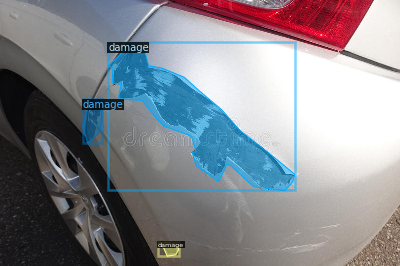

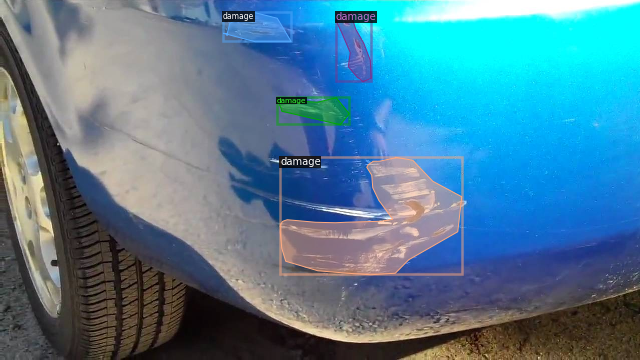

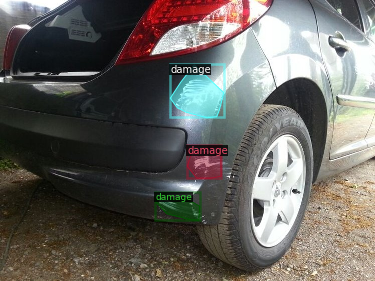

In [ ]:
imageDicts = getImageDicts(datasetPath+"train")
metadata = MetadataCatalog.get("car_dataset_train")
for item in random.sample(imageDicts, 3):
    img = cv2.imread(item['file_name'])
    visualizer = Visualizer(img[:,:,::-1], metadata=metadata,scale=0.5)
    vis = visualizer.draw_dataset_dict(item)
    cv2_imshow(vis.get_image()[:,:,::-1])

## Training

Fine-tune COCO pretrained Resnet-50 FPN Mask R-CNN

In [ ]:
#set training configuration
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("car_dataset_train", )
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.002
cfg.SOLVER.MAX_ITER = 350   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (damage)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[12/10 07:19:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:22, 8.03MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/10 07:19:44 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/10 07:20:01 d2.utils.events]:  eta: 0:02:18  iter: 19  total_loss: 1.71  loss_cls: 0.6127  loss_box_reg: 0.3348  loss_mask: 0.6908  loss_rpn_cls: 0.05747  loss_rpn_loc: 0.01889  time: 0.4276  data_time: 0.0171  lr: 0.00011046  max_mem: 2756M
[12/10 07:20:10 d2.utils.events]:  eta: 0:02:12  iter: 39  total_loss: 1.474  loss_cls: 0.33  loss_box_reg: 0.3791  loss_mask: 0.64  loss_rpn_cls: 0.04336  loss_rpn_loc: 0.01508  time: 0.4308  data_time: 0.0088  lr: 0.00022463  max_mem: 2756M
[12/10 07:20:19 d2.utils.events]:  eta: 0:02:09  iter: 59  total_loss: 1.368  loss_cls: 0.3046  loss_box_reg: 0.4991  loss_mask: 0.5374  loss_rpn_cls: 0.03021  loss_rpn_loc: 0.01588  time: 0.4450  data_time: 0.0087  lr: 0.00033881  max_mem: 2756M
[12/10 07:20:28 d2.utils.events]:  eta: 0:02:01  iter: 79  total_loss: 1.306  loss_cls: 0.3036  loss_box_reg: 0.5068  loss_mask: 0.4861  loss_rpn_cls: 0.02832  loss_rpn_loc: 0.01051  time: 0.4466  data_time: 0.0106  lr: 0.00045298  max_mem: 2756M
[12/10 07:20:37 d

## Create Predictor

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.DATASETS.TEST = ("car_dataset_val", )
predictor = DefaultPredictor(cfg)

[12/10 07:22:45 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

## Visualize Predictions

HERE


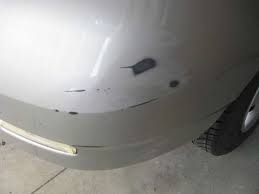

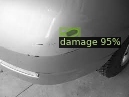

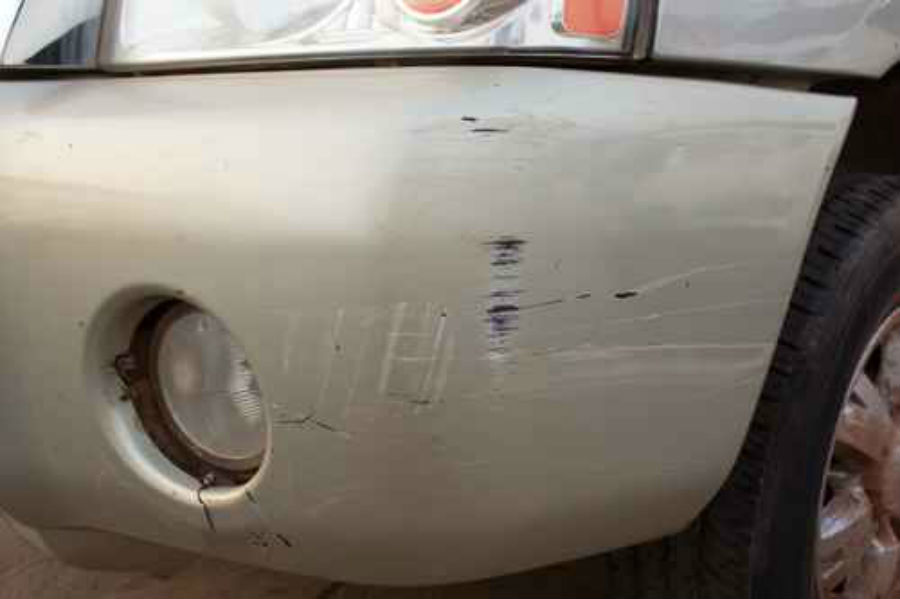

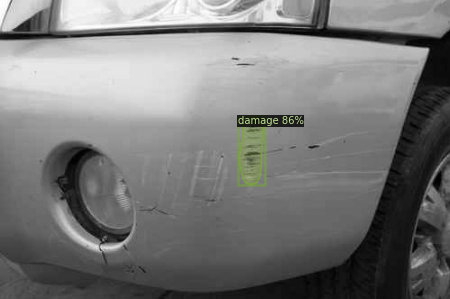

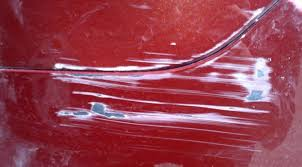

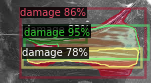

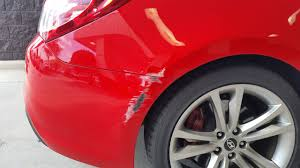

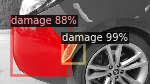

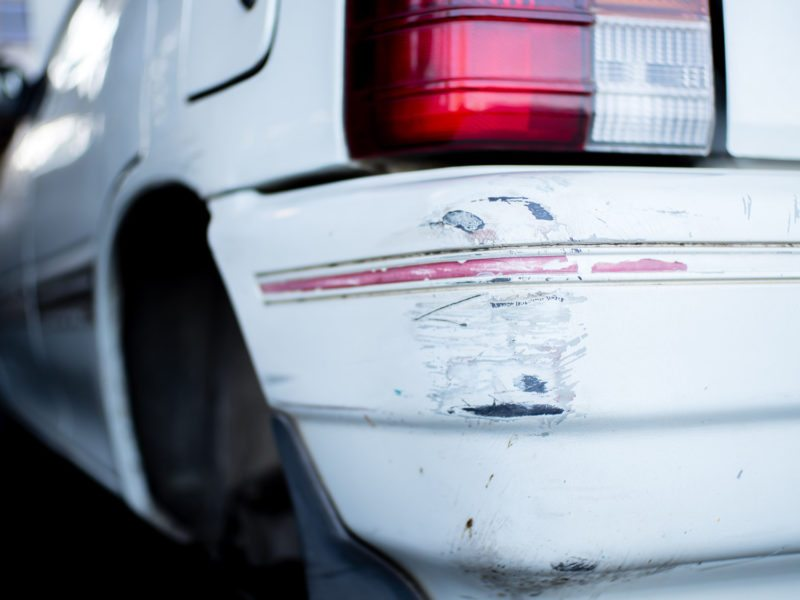

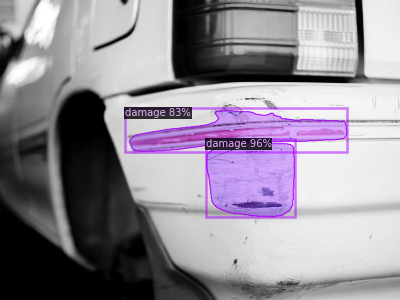

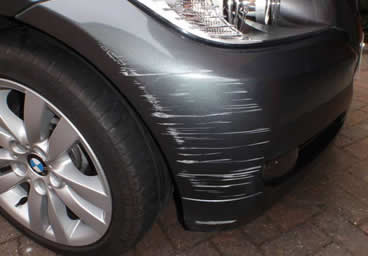

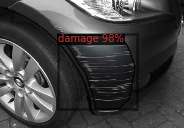

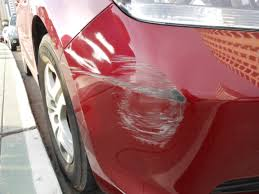

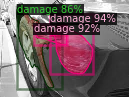

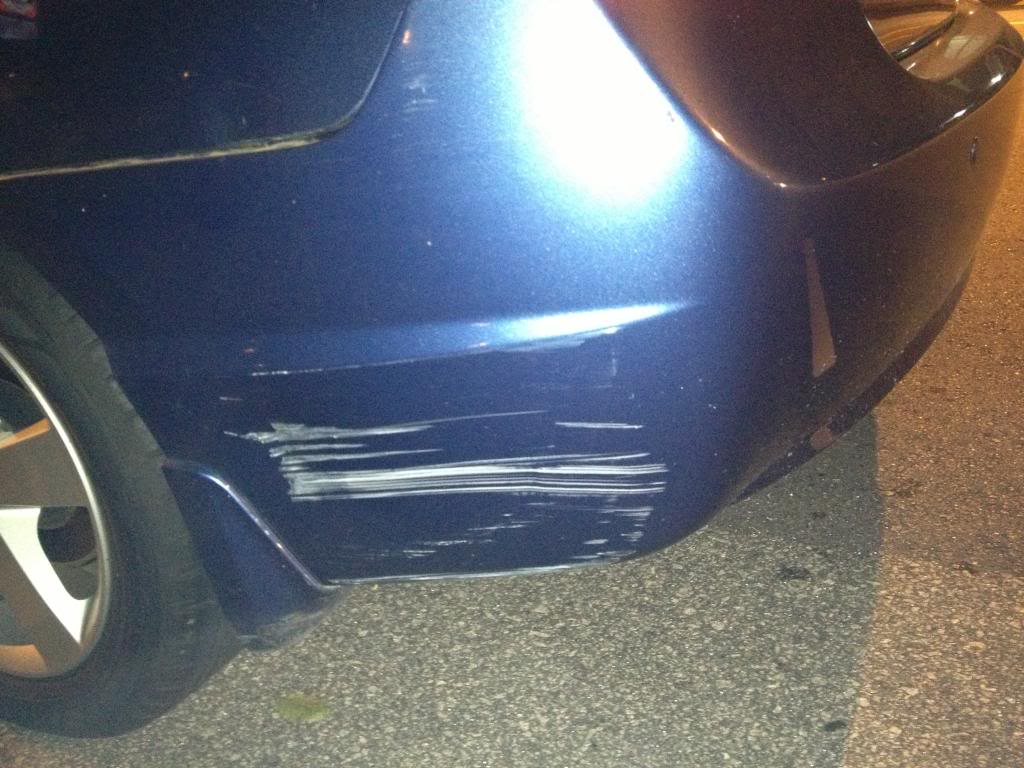

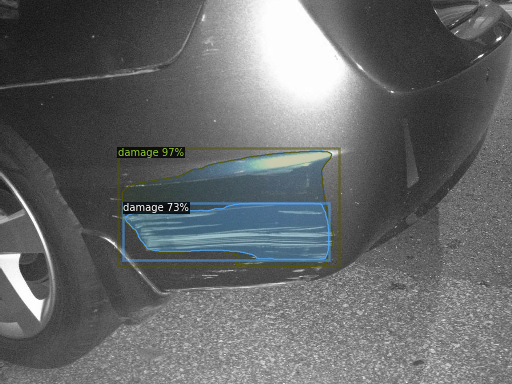

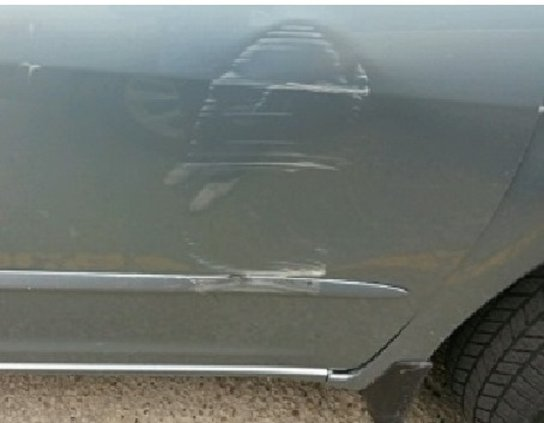

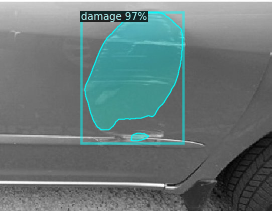

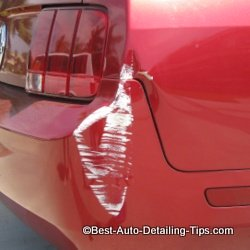

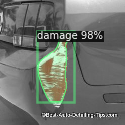

In [ ]:
from detectron2.utils.visualizer import ColorMode
valImgDicts = getImageDicts(datasetPath+"val")
for d in random.sample(valImgDicts, 10):    
    im = cv2.imread(d["file_name"])
    cv2_imshow(im)
    outputs = predictor(im)
    #print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW 
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

[12/10 07:23:00 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [12/10 07:23:00 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[12/10 07:23:00 d2.evaluation.coco_evaluation]: Trying to convert 'car_dataset_val' to COCO format ...
[12/10 07:23:00 d2.data.datasets.coco]: Converting annotations of dataset 'car_dataset_val' to COCO format ...)
HERE
[12/10 07:23:00 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/10 07:23:00 d2.data.datasets.coco]: Conversion finished, #images: 15, #annotations: 19
[12/10 07:23:00 d2.data.datasets.coco]: Caching COCO format annotations at './output/car_dataset_val_coco_format.json' ...
HERE
[12/10 07:23:00 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   damage   | 19           |
|            |          

OrderedDict([('bbox',
              {'AP': 32.252057069060946,
               'AP50': 71.44117827931862,
               'AP75': 26.356435643564353,
               'APs': 10.099009900990097,
               'APm': 46.687289608081684,
               'APl': 20.4436979910391}),
             ('segm',
              {'AP': 26.40423719063636,
               'AP50': 65.00155605622675,
               'AP75': 13.352192362093351,
               'APs': 15.148514851485146,
               'APm': 34.176319090034625,
               'APl': 26.402594426109278})])